# Tag in a Large World

Lets see if our agents are capable of playing in a reasonable way in a larger world.

With the usual setup this problem is obviouly hopeless for Agent 1, as Agent 2 jus need to keep his distance. So to make this interesting we will give Agent 1 diagonal moves, this will make it able to catch up with Agent 2. 

I will use simple q-learning with basic parameter choices. We will train the agents in two separate rounds, one with random starting position, to ensure they experience lots of diferent states; and another starting from the base position, to make sure they specialize in the desired problem.

In [1]:
import sys

sys.path.append("../..")

from grid_world.action import GWorldAction
from grid_world.visualization.format_objects import get_world_str
from utils.returns import returns_from_reward
from notebooks.utils.basics import basic_actions, basic_reward, basic_tag_reward
from exploring_agents import QAgent, RandomAgent, SarsaAgent, LambdaSarsaAgent
from notebooks.utils.experimentation import moving_average
from exploring_agents.training import train_tag_agents
from notebooks.utils.worlds import tagging_world_02
from grid_world.action import GWorldAction
from exploring_agents.commons.dacaying_functions import get_exp_decay


import matplotlib.pyplot as plt
import numpy as np

np.random.seed(50)

In [2]:
gworld = tagging_world_02
print(get_world_str(gworld))

9    █     █             

8          █     █  █    

7                   █    

6    █  █  █     ⚐  █    

5          █  █  █  █    

4    █     █     █       

3 █  █     █           █ 

2                █     █ 

1    █  █  █     █     █ 

0 ⚐                    █ 

  0  1  2  3  4  5  6  7 


## Training with random starts

In [3]:
agent_1 = QAgent(
    reward_function=basic_tag_reward,
    actions=[x for x in GWorldAction],
    gamma=0.9,
    alpha=0.03,
    epsilon=0.01,
)

agent_2 = QAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=0.9,
    alpha=0.03,
    epsilon=0.01,
)

episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=agent_1,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e6),
    episode_max_length=200,
    randomize_starting_positions=True,
)

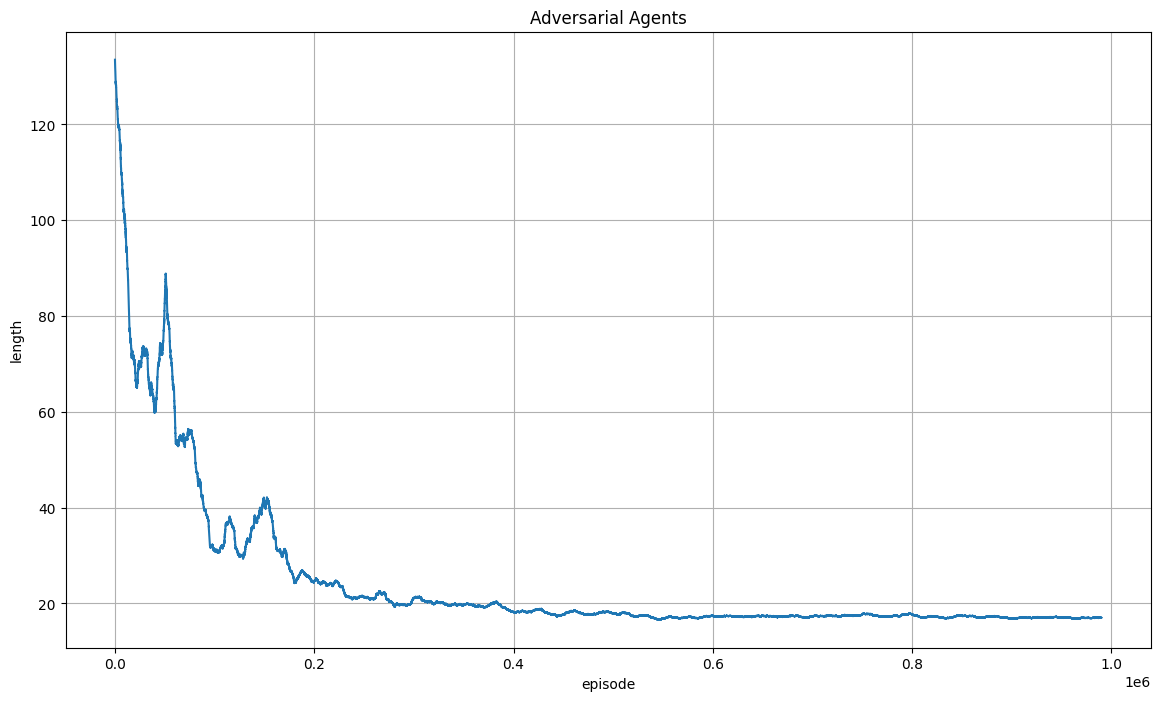

In [4]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 10000),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("Adversarial Agents")


plt.show()

In [5]:
base_path = "../.."
prefix = f"{base_path}/persistence/agents/"
filename1 = "q_agent_1_tagging_world_02_backup"
filename2 = "q_agent_2_tagging_world_02_backup"

agent_1.dump(f"{prefix}{filename1}")
agent_2.dump(f"{prefix}{filename2}")

Ok, it looks like Agent 1 is making use of his extra moves to get to Agent 2.

## Training from start position

In [6]:
agent_1 = QAgent.load(f"{prefix}{filename1}")
agent_2 = QAgent.load(f"{prefix}{filename2}")

episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=agent_1,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e6),
    episode_max_length=200,
)

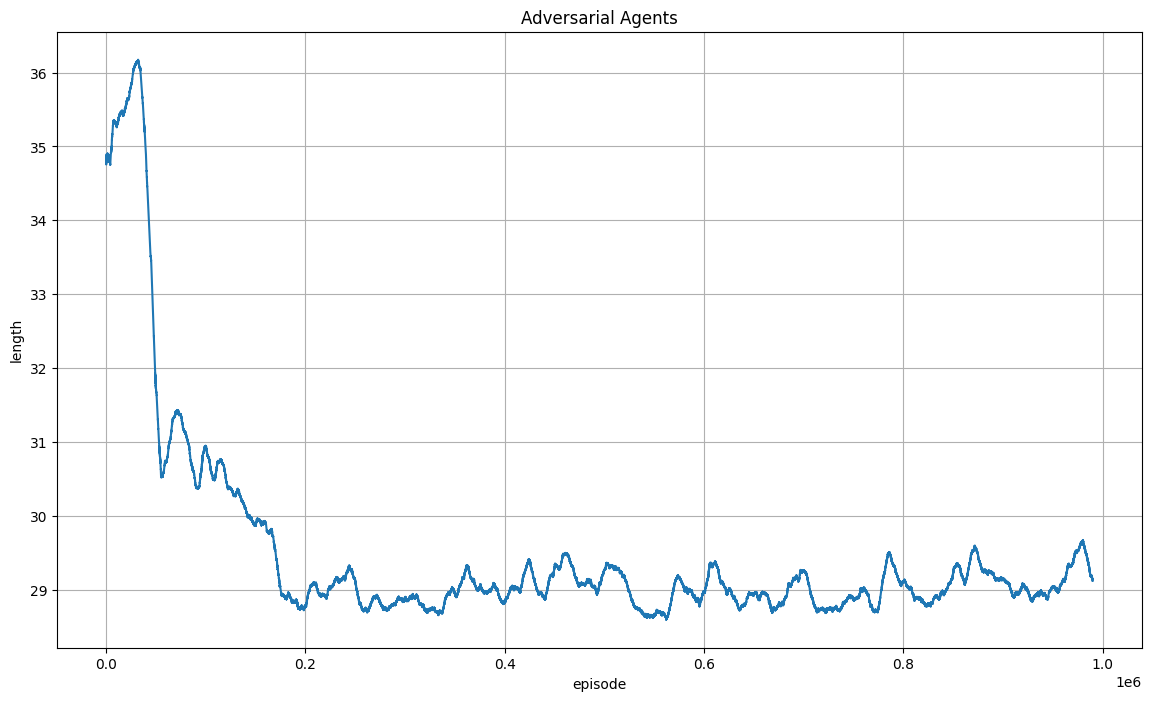

In [7]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 10000),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("Adversarial Agents")


plt.show()

As we can see Agent 1 already had a decent strategy, but the extra training from the starting position did help it improve. If I had to guess the improvement comes mostly for the initial moves in each episode. 

In [9]:
base_path = "../.."
prefix = f"{base_path}/persistence/agents/"
filename1 = "q_agent_1_tagging_world_02"
filename2 = "q_agent_2_tagging_world_02"

agent_1.dump(f"{prefix}{filename1}")
agent_2.dump(f"{prefix}{filename2}")

This dumps the agents so we can reuse then. It is interesting to look at a round of then competing, you can do so by running:


```python grid_world/visualization/animation_scripts/tag/q_vs_q_02.py```

This is pretty interesting to watch, as the agents do a pretty good job on the task.